<a href="https://colab.research.google.com/github/DAHYUN-HAN/Machine_Learning/blob/master/Ch03_ML_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ch03. Classification
* **regression** (회귀) 
* **classification** (분류)

In [4]:
#데이터셋 받아오기
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [15]:
X, y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape) 
print(type(X))

(70000, 784)
(70000,)
<class 'numpy.ndarray'>


샘플 하나가 784 feautres로 이루어져 있다. 28*28의 픽셀로 이루어진 작은 이미지.

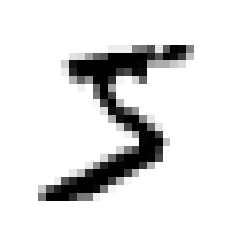

0.0


In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)#numpy에서 제공해주는 메소드를 사용하고 있다.

plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()
print(some_digit_image[0][0])#흰색의 값은 0

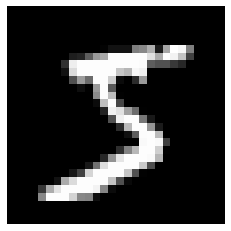

0.0
5


In [17]:
plt.imshow(some_digit_image,cmap='gray')
plt.axis('off')
plt.show()
print(some_digit_image[0][0])#여기서는 검은색 값이 0
print(y[0])

In [18]:
y[0]#''로 묶여 있다는건 문자열이라는 것.

'5'

In [19]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [20]:
import numpy as np

y = y.astype(np.uint8)#머신러닝에서는 숫자만 다루기 때문에 숫자로 바꿔줘야 한다.
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

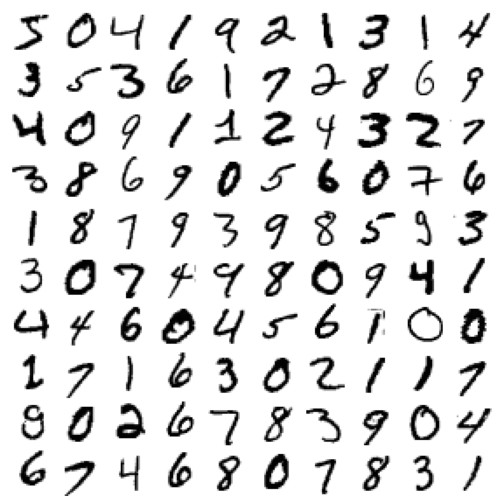

In [10]:
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = 'binary',
             interpolation="nearest")
  plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap = mpl.cm.binary, **options)
  plt.axis("off")

plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

앞에 있는 60000개를 데이터 셋으로 뒤에있는 10000개를 테스트 셋으로.

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [0]:
#숫자가 5인지 아닌지 확인하기. 5이면 true 반환, 아니면 false
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [24]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [23]:
y_test_5[:10]

array([False, False, False, False, False, False, False, False,  True,
       False])

*Stochastic Gradient Descent (SGD)* classifier  
훈련을 할 때 랜덤으로 하나의 값을 정해 그것의 최저값을 위해서 훈련. 아주 큰 데이터셋을 쉽게 다룰 수 있는 방법  
stochastic:추계학의, 확률(론)적인


In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit (X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
#위에서 정의했었음. some_digit = X[0]
sgd_clf.predict([some_digit])#5일때 true를 반환하니까 5가 정말 맞는지.

array([ True])

In [28]:
sgd_clf.predict([X[2]])

array([False])

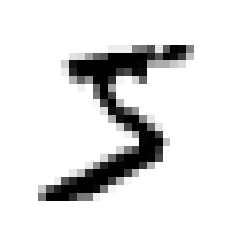

array([ True])

In [27]:
test_image = X_train[0].reshape(28,28)
plt.imshow(test_image, cmap='binary')
plt.axis('off')
plt.show()

sgd_clf.predict([X_train[0]])

#Performance Measures
* accuracy

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

#StratifiedKFold k개로 나누기. n_splits=3=> 3개로 나눔.
skfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=42)
#학습할때 본 적이 없는 데이터를 가지고 test를 한 것을 k번 진행

for train_idx, test_idx in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_idx]
  y_train_folds = y_train_5[train_idx]
  X_test_folds = X_train[test_idx]
  y_test_folds = y_train_5[test_idx]

  clone_clf.fit(X_train_folds,y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)

  n_correct = sum(y_pred == y_test_folds) #맞춘 숫자

  print(n_correct/len(y_pred))#전체에서 맞춘 숫자의 비율 = accuracy

0.9669
0.91625
0.96785


model_selection 에서 제공하는 croos_val_score

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [0]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)#무조건 틀렸다. 라고 찍을 경우

In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

사실 y_train_5는 숫자가 5인 경우는 true, 아니면 false로 대략 90%가 false를 가지고 있는 데이터이다. 그렇기 때문에 그냥 false로 찍어도 정확도가 90%가 나오는 것.  

한쪽으로 치우쳐진 데이터의 경우에는 accuracy가 제대로 된 결과를 도출 하지 못한다는 약점이 있다.

* Confusion Matrix

In [33]:
from sklearn.model_selection import cross_val_predict
from time import time

start = time()

y_train_pred = cross_val_predict(sgd_clf, 
                                 X_train, 
                                 y_train_5, 
                                 cv=3)

print('processed time :', time()-start,'(s)')

processed time : 29.864091634750366 (s)


In [34]:
y_train_pred.shape

(60000,)

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

53892는 **true** negatives. (부정이라고 판정을 내린게 **맞은것.)**  
687은 ***false*** positive (5라고 판정을 내렸고, ***틀렸다.***)  
1891은 ***false*** negatives (부정이라고 판정을 내린게 ***틀린것***.)  
3530은 **true** positive(5라고 판정을 내린게 **맞았다.**)

positive 냐 negative냐는 내가 즉, 모델이 판별한 것.  
그게 진짜냐 가짜냐에 true, false가 붙음.  
false neg 는 가짜 & neg 라는 뜻이므로 실제로는 positive 이다.

In [36]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

#Precision

$$
\text{precision} = \frac{TP}{TP+FP}
$$

#Recall

$$
\text{Recall}=\frac{TP}{TP+FN}
$$

recall의 성능을 극단적으로 높이면 precision의 성능이 낮아지고, 반대로 precison의 성능을 극단적으로 높이면 recall의 성능이 떨어지게 된다.

In [37]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


# F1

$$
\begin{align*}
F_1&=\frac{2}{\frac{1}{\text{precision}}+\frac{1}{\text{recall}}}\\
&=2\times\frac{\text{precision} \times \text{recall}}{\text{precision}+\text{recall}}\\
&=\frac{TP}{TP+\frac{FN+FP}{2}}
\end{align*}
$$

precision과 recall이 같이 커지면 커질수록 f1은 좋다.  
precision과 recall이 균형을 이룰 수록 좋음.  

F1은 둘 다 높아야 하는 건데, 여기서 파생된 F2와 F0.5가 있음.

In [39]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

경우에 따라 recall을 중요하게 생각해야 할 때, precision을 중요하게 생각할 때가 있다.  
ex1)질환의 경우 아픈 사람을 제대로 파악해야 하기 때문에, 이런 경우에는 sensitivity가 높은 recall 이 높아야 한다.== 코로나에 걸린 사람을 코로나 라고 말할 확률이 높은 것. 잘 찾아내다 보면 진짜 안걸렸지만 격리 될 수 있음. 그러나 이게 낫지 걸린 사람을 안걸렸다고 해서 질병을 퍼트리거나 죽는것보다는 나음.  
ex2)사형의 경우에는 무고한 사람을 죽이면 다시 되돌릴 수 없기 때문에 precision이 높아야한다.

# F Scores
> 
> * $F_{2}$ score는 Recall을 보다 중시!
> * $F_{0.5}$ score는 Precision을 보다 중ㅁ시!
>
> $$
F_\beta \text{ Score} = \frac{1}{\alpha \frac{1}{\text{Precision}} + (1-\alpha) \frac{1}{\text{Recall}}} = \frac{(\beta^2+1) (\text{Precision})(\text{Recall})}{\beta^2 \text{Precision}+\text{Recall}}
$$

In [41]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [42]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [47]:
threshold = 3000 #0, 과 3000 일때 결과 다름.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

threshold를 올리면 recall은 떨어진다.

In [48]:
start = time()
y_scores = cross_val_predict(
    sgd_clf,
    X_train,
    y_train_5,
    cv=3,
    method='decision_function'
)
print('processed time:',time()-start,'(s)')

processed time: 30.122694969177246 (s)


In [49]:
y_scores.shape

(60000,)

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_train_5,
    y_scores
)

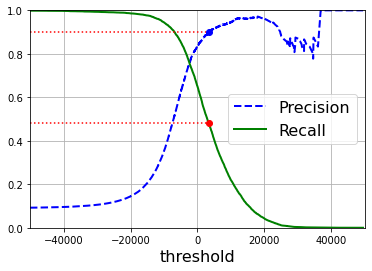

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
  plt.legend(loc='center right', fontsize=16)
  plt.xlabel('threshold', fontsize=16)
  plt.grid(True)
  plt.axis([-50000,50000,0,1])


plot_precision_recall_vs_threshold(
    precisions,
    recalls,
    thresholds
)

recall_90precision = recalls[np.argmax(precisions>=0.9)]
threshold_90precision = thresholds[np.argmax(precisions>=0.9)]

plt.plot([-50000,threshold_90precision], [0.9,0.9], "r:")
plt.plot([-50000,threshold_90precision], [recall_90precision,recall_90precision], "r:")
plt.plot([threshold_90precision],[0.9], "bo")
plt.plot([threshold_90precision],[recall_90precision], "ro")
plt.show()

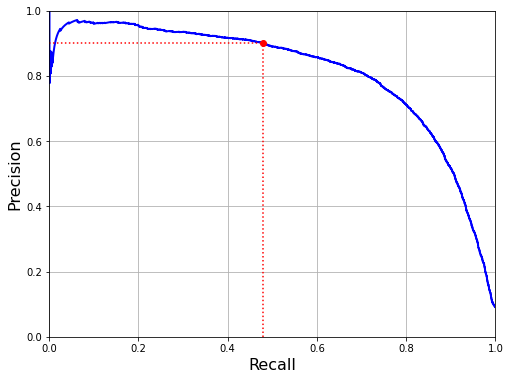

In [52]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90precision, recall_90precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90precision], [0.9, 0.9], "r:")
plt.plot([recall_90precision], [0.9], "ro")

plt.show()

In [53]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3370.0194991439557

In [54]:
print(precisions[:10])
print(precisions[-10:])

[0.09040123 0.09038606 0.09038757 0.09038907 0.09039058 0.09039209
 0.0903936  0.0903951  0.09039661 0.09039812]
[0.77777778 0.875      0.85714286 0.83333333 1.         1.
 1.         1.         1.         1.        ]


In [55]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


#ROC Curve

The **TNR is also called specificity**. Hence, the ROC curve plots `sensitivity (recall)` versus `1 – specificity`.



In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

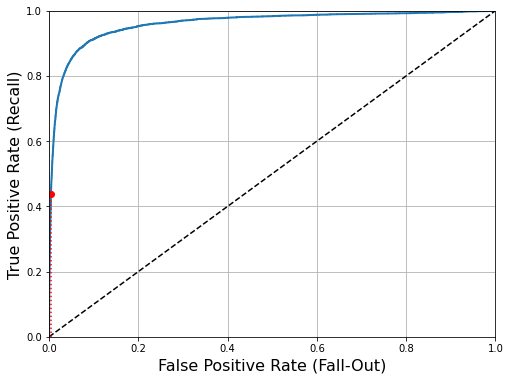

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.axis([0, 1, 0, 1])                                    # Not shown in the book
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
  plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
#save_fig("roc_curve_plot")                         # Not shown
plt.show()

선 아래 넓이가 성능이 됨.

type1 error(알파): 1종오류. 실제 양성인 것을 음성으로 판정하는 경우이다. 거짓 양성 또는 알파 오류(영어: α error)라고도 한다.  
type2 error(베타): 2종오류. 실제 음성인 것을 양성으로 판정하는 경우이다. 거짓 음성 또는 베타 오류(영어: β error)라고도 한다.

In [59]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#TIP

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

y_probas_forest = cross_val_predict(forest_clf, 
                                    X_train, 
                                    y_train_5, 
                                    cv=3,
                                    method="predict_proba")

확률. 0일 확률, 2일 확률

In [64]:
y_probas_forest.shape

(60000, 2)

In [0]:
y_scores_forest = y_probas_forest[:, 1] # positive 확률을 사용할 것이기 때문에 1.

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

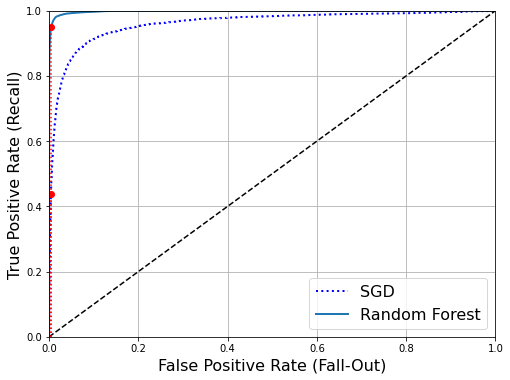

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
#save_fig("roc_curve_comparison_plot")
plt.show()

In [66]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [67]:
y_train_pred_forest = cross_val_predict(forest_clf, 
                                        X_train, 
                                        y_train_5, 
                                        cv=3)

precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [68]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

#Multicalss Classification

하나의 SVM 모델의 클래스가 3개라면
0인지 아닌지 1개, 1인지 아닌지 1개, 2인지 아닌지 1개를 만들어서 이 세개의 학습기를 묶어서 어떤 숫자를 여기에 넣으면 결과값이 나옴.  
여기서 제일 큰 값을 낸 것을 정답이라고 생각.  
==OVR.  

SVM은 데이터가 늘어나면 메모리에도 문제가 생기고, 학습도 굉장히 오래 걸리기 때문에 데이터의 양이 적을때 효과가 좋다.

In [70]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", 
              random_state=42)  # default OvO
svm_clf.fit(X_train[:1000], 
            y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [71]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [72]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [73]:
np.argmax(some_digit_scores)

5

In [74]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
svm_clf.classes_[5]

5

In [76]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [77]:
len(ovr_clf.estimators_)

10

In [78]:
start = time()
sgd_clf.fit(X_train, y_train)#그나마 가볍기 때문에 y_train을 다 씀.
print(sgd_clf.predict([some_digit]))
print("processed time :", time() - start)

[3]
processed time : 185.99575304985046


decision_function은 내가 가지고 있는 class의 갯수만큼 나온다.

In [79]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [81]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
sgd_clf.classes_[np.argmax(some_digit_scores)]

[[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]


3

In [82]:
start = time() 

r =cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy") #87%수준.
print(r)
print("time :", time() - start)

[0.87365 0.85835 0.8689 ]
time : 302.7666299343109


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

start = time() 
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
r = cross_val_score(sgd_clf, 
                X_train_scaled, 
                y_train, 
                cv=3, 
                scoring="accuracy")
print(r)
print("time :", time() - start)

[0.8983 0.891  0.9018]
time : 802.2257215976715


# Error Analysis
어떤 에러때문에 이러한 결과가 나왔는지 잘 살피고, 살핀것을 바탕으로 성능을 끌어올리자.

In [84]:
start = time()
y_train_pred = cross_val_predict(sgd_clf, 
                                 X_train_scaled, 
                                 y_train, cv=3)
print("time :", time() - start)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

time : 809.3032929897308


array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [0]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

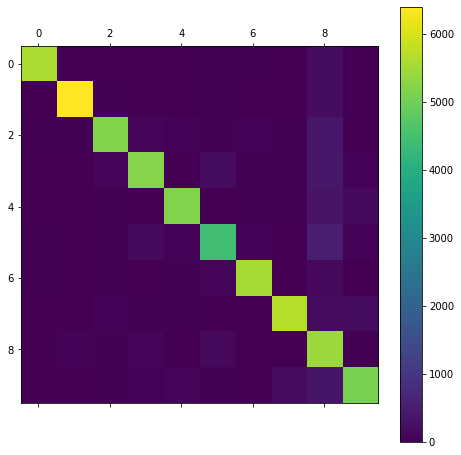

In [86]:
plot_confusion_matrix(conf_mx)
plt.show()

5를 8로 판단하는 경우가 좀 많은 편이라는걸 알 수 있다.

In [0]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums 

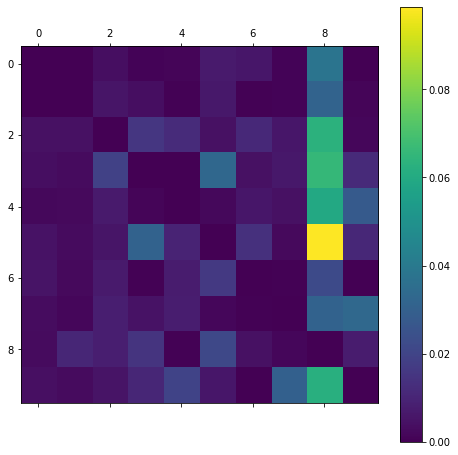

In [88]:
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)
plt.show()

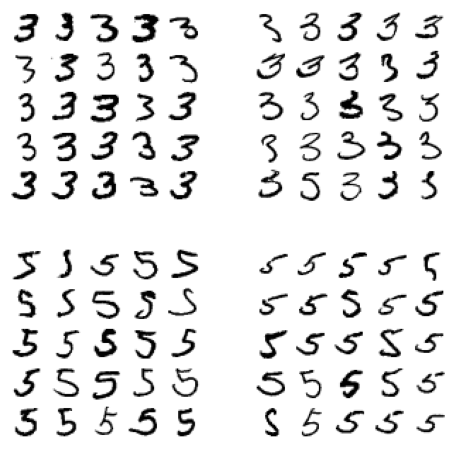

In [89]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

#Multilable classification  
같은 클래스인데, 그 안에서 값을 여러 형태를 가지게 되는 것.
멀티 라벨은 레이블이 여러개. 그 전에는 아웃풋이 1개 그 숫자에 해당하는 클래스를 보여주는거니까. 멀티 아웃풋은 여러개가 될 수 있다.
[1,0,1] 처럼 레이블링이 3개 더 붙는다.  
안면인식 ->> 엘리스 있니 없니, 밥 있니 없니, 찰리 있니 없니. 이런식으로 레이블이 여러개.
엘리스 있고, 밥 없고, 찰리 있다. 이런 식으로 해석 됨.  

In [90]:
import time
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)#7을 기준으로 라벨 하나 더.
y_train_odd = (y_train % 2 == 1)#홀수 인지 아닌지 라벨 하나 더.
y_multilabel = np.c_[y_train_large, y_train_odd]#두개 라벨 붙여줌.

knn_clf = KNeighborsClassifier()#하나의 classifier 모델인데 두개를 맞춰야 한다.
start = time.time()
knn_clf.fit(X_train, y_multilabel)
print("time :", time.time() - start)


time : 17.81871795654297


In [91]:
print(knn_clf.predict([some_digit]))
#5라는 값을 넣었더니, 7보다 크지 않고, 홀수라고 한다.

[[False  True]]


In [92]:
start = time.time()
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)#학습할때 보지 않은 클린한 데이터로 테스트 가능.
print("time :", time.time() - start)
f1_score(y_multilabel, y_train_knn_pred, average="macro")#mecro 모드, micro 모드 등 다양한 모드가 있음.

time : 4374.929067134857


0.976410265560605

In [0]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

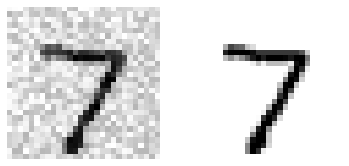

In [94]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

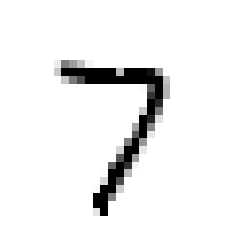

In [95]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)